Step 1: Data Preparation

1.1. Load the Data

In [4]:
import pandas as pd

# Load the data
customers = pd.read_csv('Customers.csv')
transactions = pd.read_csv('Transactions.csv')

# Display the first few rows of each dataset
print("Customers Data:")
print(customers.head())
print("\nTransactions Data:")
print(transactions.head())


Customers Data:
  CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15

Transactions Data:
  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166      C0127      P067  2024-04-25 07:38:55         1   
3        T00272      C0087      P067  2024-03-26 22:55:37         2   
4        T00363      C0070      P067  2024-03-21 15:10:10         3   

   TotalValue   Price  
0      300.68  300.68  
1      300.68  300.68  
2      300.68  300.68  
3      601.36  300.68  
4      902.04  300.68  


1.2. Merge Customer and Transaction Data

In [2]:
# Merge datasets on CustomerID
merged_data = pd.merge(transactions, customers, on='CustomerID', how='inner')

# Display merged data
print("\nMerged Data:")
print(merged_data.head())


  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166      C0127      P067  2024-04-25 07:38:55         1   
3        T00272      C0087      P067  2024-03-26 22:55:37         2   
4        T00363      C0070      P067  2024-03-21 15:10:10         3   

   TotalValue   Price     CustomerName         Region  SignupDate  
0      300.68  300.68   Andrea Jenkins         Europe  2022-12-03  
1      300.68  300.68  Brittany Harvey           Asia  2024-09-04  
2      300.68  300.68  Kathryn Stevens         Europe  2024-04-04  
3      601.36  300.68  Travis Campbell  South America  2024-04-11  
4      902.04  300.68    Timothy Perez         Europe  2022-03-15  


3. Handle Missing Values

In [5]:
# Check for missing values
print("\nMissing Values in Merged Data:")
print(merged_data.isnull().sum())

# Handling missing values (e.g., fill missing values with mean or drop rows)
merged_data.fillna(merged_data.mean(numeric_only=True), inplace=True)

# Verify no missing values remain
print("\nMissing Values After Handling:")
print(merged_data.isnull().sum())



Missing Values in Merged Data:
TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
CustomerName       0
Region             0
SignupDate         0
dtype: int64

Missing Values After Handling:
TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
CustomerName       0
Region             0
SignupDate         0
dtype: int64


4. Feature Engineering

    a. Aggregate Transactional Data

In [9]:
# Aggregate features for each customer
aggregated_data = merged_data.groupby('CustomerID').agg({
    'TotalValue': ['sum', 'mean', 'count'],  # TotalValue, Average Purchase, Frequency
    'TransactionDate': 'count'  # Total Transactions
}).reset_index()

# Rename columns for better readability
aggregated_data.columns = ['CustomerID', 'TotalValue', 'AveragePurchase', 'Frequency', 'TransactionCount']

# Display aggregated data
print("\nAggregated Transactional Data:")
print(aggregated_data.head())



Aggregated Transactional Data:
  CustomerID  TotalValue  AveragePurchase  Frequency  TransactionCount
0      C0001     3354.52          670.904          5                 5
1      C0002     1862.74          465.685          4                 4
2      C0003     2725.38          681.345          4                 4
3      C0004     5354.88          669.360          8                 8
4      C0005     2034.24          678.080          3                 3


b. Add Time-Based Features

In [10]:
# Convert TransactionDate to datetime
merged_data['TransactionDate'] = pd.to_datetime(merged_data['TransactionDate'])

# Extract day of the week and month
merged_data['TransactionDay'] = merged_data['TransactionDate'].dt.day_name()
merged_data['TransactionMonth'] = merged_data['TransactionDate'].dt.month

# Aggregate time-based features
time_features = merged_data.groupby('CustomerID').agg({
    'TransactionDay': lambda x: x.mode()[0],  # Most frequent day
    'TransactionMonth': lambda x: x.mode()[0]  # Most frequent month
}).reset_index()

# Merge time features with aggregated data
customer_features = pd.merge(aggregated_data, time_features, on='CustomerID', how='left')

# Display updated customer features
print("\nCustomer Features with Time-Based Features:")
print(customer_features.head())



Customer Features with Time-Based Features:
  CustomerID  TotalValue  AveragePurchase  Frequency  TransactionCount  \
0      C0001     3354.52          670.904          5                 5   
1      C0002     1862.74          465.685          4                 4   
2      C0003     2725.38          681.345          4                 4   
3      C0004     5354.88          669.360          8                 8   
4      C0005     2034.24          678.080          3                 3   

  TransactionDay  TransactionMonth  
0        Tuesday                 1  
1        Tuesday                 2  
2         Sunday                 6  
3         Monday                12  
4         Friday                 3  


5. Normalize or Scale Features

In [11]:
from sklearn.preprocessing import MinMaxScaler

# Select numerical columns for scaling
numerical_features = ['TotalValue', 'AveragePurchase', 'Frequency', 'TransactionCount']

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Scale numerical features
customer_features[numerical_features] = scaler.fit_transform(customer_features[numerical_features])

# Display scaled features
print("\nScaled Customer Features:")
print(customer_features.head())



Scaled Customer Features:
  CustomerID  TotalValue  AveragePurchase  Frequency  TransactionCount  \
0      C0001    0.308942         0.474336        0.4               0.4   
1      C0002    0.168095         0.308940        0.3               0.3   
2      C0003    0.249541         0.482751        0.3               0.3   
3      C0004    0.497806         0.473092        0.7               0.7   
4      C0005    0.184287         0.480120        0.2               0.2   

  TransactionDay  TransactionMonth  
0        Tuesday                 1  
1        Tuesday                 2  
2         Sunday                 6  
3         Monday                12  
4         Friday                 3  


6. Select Features for Clustering

In [12]:
# Select final features for clustering
final_features = customer_features[['TotalValue', 'AveragePurchase', 'Frequency', 'TransactionCount', 'TransactionDay', 'TransactionMonth']]

# Encode categorical features (e.g., TransactionDay) using one-hot encoding
final_features = pd.get_dummies(final_features, columns=['TransactionDay'], drop_first=True)

# Display final features
print("\nFinal Features for Clustering:")
print(final_features.head())



Final Features for Clustering:
   TotalValue  AveragePurchase  Frequency  TransactionCount  TransactionMonth  \
0    0.308942         0.474336        0.4               0.4                 1   
1    0.168095         0.308940        0.3               0.3                 2   
2    0.249541         0.482751        0.3               0.3                 6   
3    0.497806         0.473092        0.7               0.7                12   
4    0.184287         0.480120        0.2               0.2                 3   

   TransactionDay_Monday  TransactionDay_Saturday  TransactionDay_Sunday  \
0                  False                    False                  False   
1                  False                    False                  False   
2                  False                    False                   True   
3                   True                    False                  False   
4                  False                    False                  False   

   TransactionDay_Thursd

Step 2: Select Clustering Algorithm
1. Choose Clustering Algorithm - K Means
2. Determine the Optimal Number of Clusters

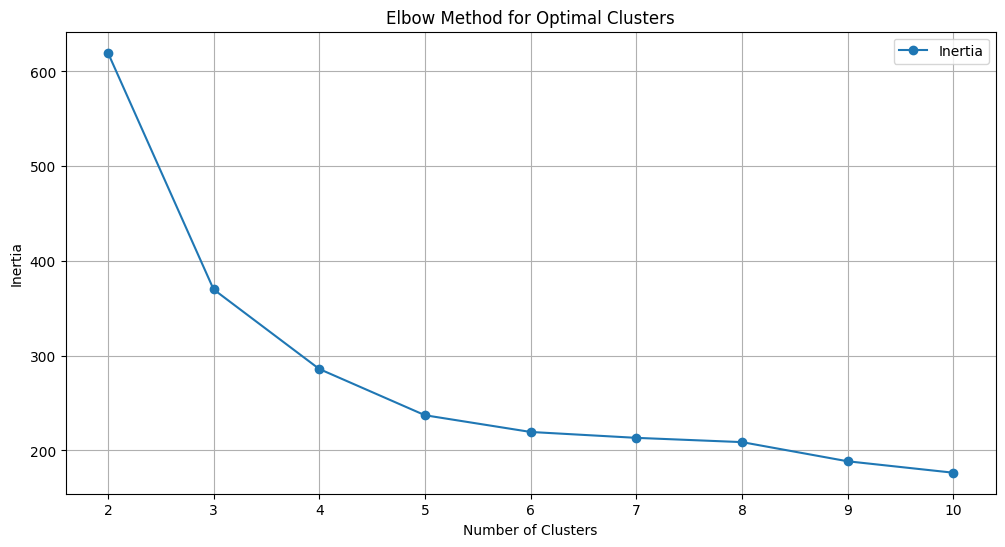

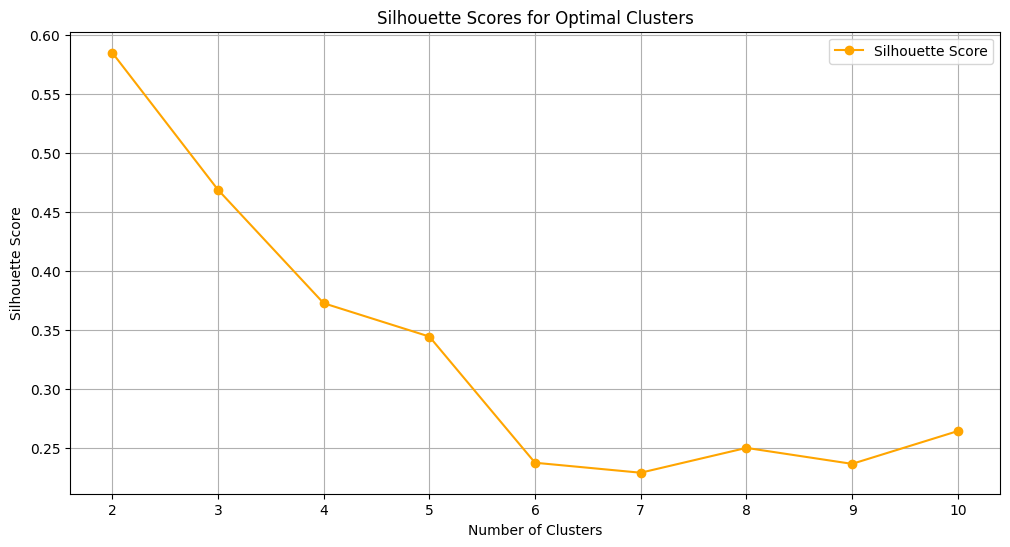

In [13]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Extract numerical features for clustering
numerical_features = final_features.drop(columns=['CustomerID'], errors='ignore')

# Elbow Method
inertia = []
silhouette_scores = []
cluster_range = range(2, 11)  # Testing 2 to 10 clusters

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(numerical_features)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(numerical_features, kmeans.labels_))

# Plot Elbow Method
plt.figure(figsize=(12, 6))
plt.plot(cluster_range, inertia, marker='o', label='Inertia')
plt.title('Elbow Method for Optimal Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.legend()
plt.grid()
plt.show()

# Plot Silhouette Scores
plt.figure(figsize=(12, 6))
plt.plot(cluster_range, silhouette_scores, marker='o', label='Silhouette Score', color='orange')
plt.title('Silhouette Scores for Optimal Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.legend()
plt.grid()
plt.show()


3. Implement the Clustering Algorithm

K Means

In [14]:
# Optimal number of clusters (assume from Elbow/Silhouette results)
optimal_clusters = 4

# Initialize and fit K-Means
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
kmeans.fit(numerical_features)

# Add cluster labels to the dataset
customer_features['Cluster'] = kmeans.labels_

# Display the resulting clusters
print("\nClustered Data:")
print(customer_features.head())



Clustered Data:
  CustomerID  TotalValue  AveragePurchase  Frequency  TransactionCount  \
0      C0001    0.308942         0.474336        0.4               0.4   
1      C0002    0.168095         0.308940        0.3               0.3   
2      C0003    0.249541         0.482751        0.3               0.3   
3      C0004    0.497806         0.473092        0.7               0.7   
4      C0005    0.184287         0.480120        0.2               0.2   

  TransactionDay  TransactionMonth  Cluster  
0        Tuesday                 1        1  
1        Tuesday                 2        1  
2         Sunday                 6        2  
3         Monday                12        0  
4         Friday                 3        3  


DBSCAN (Density-Based Clustering)

In [15]:
from sklearn.cluster import DBSCAN

# Initialize and fit DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)  # Adjust eps and min_samples based on your data
dbscan_labels = dbscan.fit_predict(numerical_features)

# Add cluster labels to the dataset
customer_features['Cluster_DBSCAN'] = dbscan_labels

# Display the resulting clusters
print("\nDBSCAN Clustered Data:")
print(customer_features.head())



DBSCAN Clustered Data:
  CustomerID  TotalValue  AveragePurchase  Frequency  TransactionCount  \
0      C0001    0.308942         0.474336        0.4               0.4   
1      C0002    0.168095         0.308940        0.3               0.3   
2      C0003    0.249541         0.482751        0.3               0.3   
3      C0004    0.497806         0.473092        0.7               0.7   
4      C0005    0.184287         0.480120        0.2               0.2   

  TransactionDay  TransactionMonth  Cluster  Cluster_DBSCAN  
0        Tuesday                 1        1               0  
1        Tuesday                 2        1              -1  
2         Sunday                 6        2              -1  
3         Monday                12        0              -1  
4         Friday                 3        3              -1  


Hierarchical Clustering

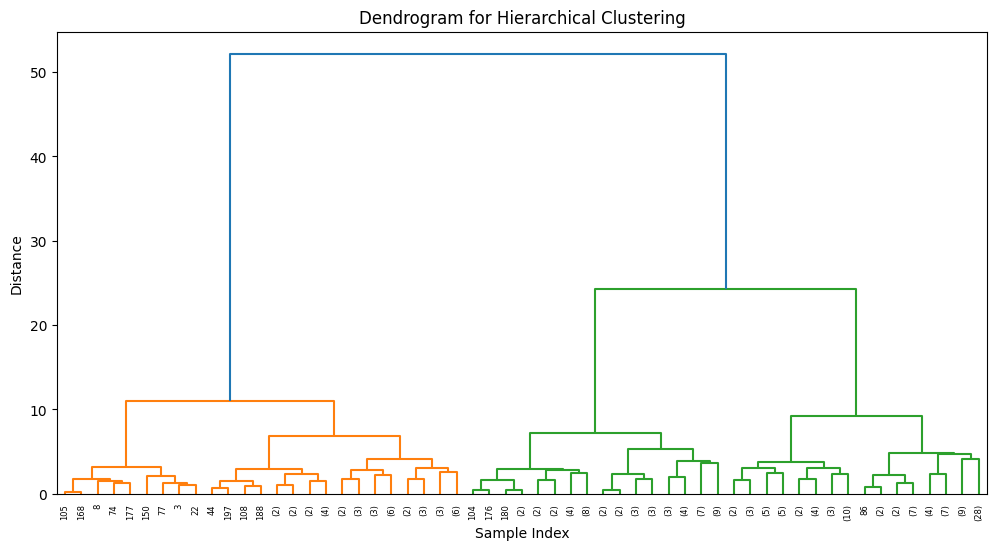


Hierarchical Clustered Data:
  CustomerID  TotalValue  AveragePurchase  Frequency  TransactionCount  \
0      C0001    0.308942         0.474336        0.4               0.4   
1      C0002    0.168095         0.308940        0.3               0.3   
2      C0003    0.249541         0.482751        0.3               0.3   
3      C0004    0.497806         0.473092        0.7               0.7   
4      C0005    0.184287         0.480120        0.2               0.2   

  TransactionDay  TransactionMonth  Cluster  Cluster_DBSCAN  \
0        Tuesday                 1        1               0   
1        Tuesday                 2        1              -1   
2         Sunday                 6        2              -1   
3         Monday                12        0              -1   
4         Friday                 3        3              -1   

   Cluster_Hierarchical  
0                     0  
1                     0  
2                     2  
3                     3  
4               

In [17]:
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

# Generate linkage matrix for dendrogram
linkage_matrix = linkage(numerical_features, method='ward')

# Plot dendrogram
plt.figure(figsize=(12, 6))
dendrogram(linkage_matrix, truncate_mode='level', p=5)
plt.title('Dendrogram for Hierarchical Clustering')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

# Perform Agglomerative Clustering
hierarchical = AgglomerativeClustering(n_clusters=optimal_clusters, metric='euclidean', linkage='ward')
hierarchical_labels = hierarchical.fit_predict(numerical_features)

# Add cluster labels to the dataset
customer_features['Cluster_Hierarchical'] = hierarchical_labels

# Display the resulting clusters
print("\nHierarchical Clustered Data:")
print(customer_features.head())


Gaussian Mixture Models (GMM)

In [18]:
from sklearn.mixture import GaussianMixture

# Initialize and fit GMM
gmm = GaussianMixture(n_components=optimal_clusters, random_state=42)
gmm_labels = gmm.fit_predict(numerical_features)

# Add cluster labels to the dataset
customer_features['Cluster_GMM'] = gmm_labels

# Display the resulting clusters
print("\nGMM Clustered Data:")
print(customer_features.head())



GMM Clustered Data:
  CustomerID  TotalValue  AveragePurchase  Frequency  TransactionCount  \
0      C0001    0.308942         0.474336        0.4               0.4   
1      C0002    0.168095         0.308940        0.3               0.3   
2      C0003    0.249541         0.482751        0.3               0.3   
3      C0004    0.497806         0.473092        0.7               0.7   
4      C0005    0.184287         0.480120        0.2               0.2   

  TransactionDay  TransactionMonth  Cluster  Cluster_DBSCAN  \
0        Tuesday                 1        1               0   
1        Tuesday                 2        1              -1   
2         Sunday                 6        2              -1   
3         Monday                12        0              -1   
4         Friday                 3        3              -1   

   Cluster_Hierarchical  Cluster_GMM  
0                     0            3  
1                     0            3  
2                     2            2  

Assign Cluster Labels

In [20]:
# Add K-Means cluster labels
customer_features['Cluster'] = kmeans.labels_
# Add DBSCAN cluster labels
customer_features['Cluster_DBSCAN'] = dbscan.labels_
# Add hierarchical cluster labels
customer_features['Cluster_Hierarchical'] = hierarchical_labels
# Add GMM cluster labels
customer_features['Cluster_GMM'] = gmm_labels



Inspect Cluster Assignments

In [21]:
# Cluster distribution
print(customer_features['Cluster'].value_counts())

# Preview the dataset with clusters
print(customer_features.head())


Cluster
1    78
3    43
2    39
0    39
Name: count, dtype: int64
  CustomerID  TotalValue  AveragePurchase  Frequency  TransactionCount  \
0      C0001    0.308942         0.474336        0.4               0.4   
1      C0002    0.168095         0.308940        0.3               0.3   
2      C0003    0.249541         0.482751        0.3               0.3   
3      C0004    0.497806         0.473092        0.7               0.7   
4      C0005    0.184287         0.480120        0.2               0.2   

  TransactionDay  TransactionMonth  Cluster  Cluster_DBSCAN  \
0        Tuesday                 1        1               0   
1        Tuesday                 2        1              -1   
2         Sunday                 6        2              -1   
3         Monday                12        0              -1   
4         Friday                 3        3              -1   

   Cluster_Hierarchical  Cluster_GMM  
0                     0            3  
1                     0         

Save Clustered Dataset

In [22]:
# Save the clustered dataset
customer_features.to_csv('clustered_customers.csv', index=False)


Step 3: Evaluate Clustering

1. Compute Davies-Bouldin Index (DB Index)

<ipython-input-29-114f18df22a8>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clustering_features.replace([np.inf, -np.inf], np.nan, inplace=True)
<ipython-input-29-114f18df22a8>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clustering_features.fillna(clustering_features.mean(), inplace=True)


Number of Clusters: 2, DB Index: 1.060
Number of Clusters: 3, DB Index: 0.934
Number of Clusters: 4, DB Index: 0.866
Number of Clusters: 5, DB Index: 0.885
Number of Clusters: 6, DB Index: 0.841
Number of Clusters: 7, DB Index: 0.868
Number of Clusters: 8, DB Index: 0.995
Number of Clusters: 9, DB Index: 0.836
Number of Clusters: 10, DB Index: 0.807


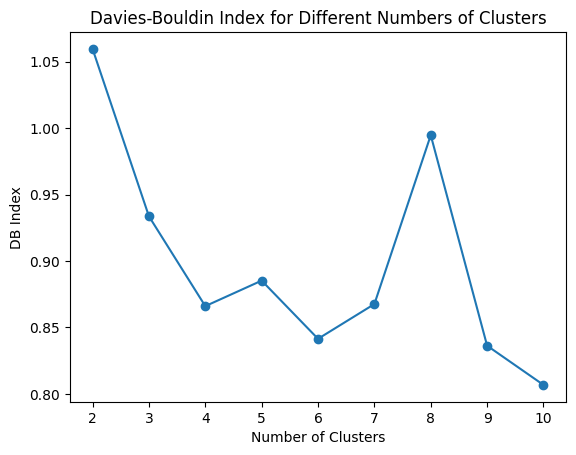

Final Davies-Bouldin Index after optimization: 0.807


In [29]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score
import matplotlib.pyplot as plt

# Step 1: Handle infinite or large values
clustering_features = customer_features[["TotalValue", "Frequency", "AvgTransactionSize"]]  # Adjust based on your dataset

# Replace infinite values with NaN
clustering_features.replace([np.inf, -np.inf], np.nan, inplace=True)

# Handle NaN by replacing with the mean of each column (or use median, interpolation, etc.)
clustering_features.fillna(clustering_features.mean(), inplace=True)

# Step 2: Scale the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(clustering_features)

# Step 3: Try different numbers of clusters (2 to 10 clusters)
db_indexes = []
for n_clusters in range(2, 11):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    customer_features['Cluster'] = kmeans.fit_predict(scaled_features)

    # Step 4: Compute Davies-Bouldin Index for each n_clusters
    db_index = davies_bouldin_score(scaled_features, customer_features['Cluster'])
    db_indexes.append(db_index)
    print(f"Number of Clusters: {n_clusters}, DB Index: {db_index:.3f}")

# Step 5: Plot the DB Index for different numbers of clusters
plt.plot(range(2, 11), db_indexes, marker='o')
plt.title('Davies-Bouldin Index for Different Numbers of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('DB Index')
plt.show()

# Step 6: Choose the number of clusters with the lowest DB Index and assign final clusters
best_n_clusters = db_indexes.index(min(db_indexes)) + 2  # Add 2 to account for the range starting at 2
final_kmeans = KMeans(n_clusters=best_n_clusters, random_state=42)
customer_features['Cluster'] = final_kmeans.fit_predict(scaled_features)

# Recompute and display the final DB Index
final_db_index = davies_bouldin_score(scaled_features, customer_features['Cluster'])
print(f"Final Davies-Bouldin Index after optimization: {final_db_index:.3f}")


2. Compute Silhouette Score

In [30]:
from sklearn.metrics import silhouette_score

# Calculate Silhouette Score
silhouette_avg = silhouette_score(clustering_features, customer_features['Cluster'])
print(f"Silhouette Score: {silhouette_avg:.3f}")


Silhouette Score: 0.361


4. Interpret Clustering Results

In [32]:
# Cluster distribution
cluster_counts = customer_features['Cluster'].value_counts()
print("Cluster Sizes:")
print(cluster_counts)


Cluster Sizes:
Cluster
9    39
8    23
6    22
1    20
5    20
2    18
0    17
7    15
3    14
4    11
Name: count, dtype: int64


In [33]:
# Group by cluster to calculate statistics
cluster_summary = customer_features.groupby('Cluster').agg({
    'TotalValue': ['mean', 'median'],
    'Frequency': ['mean', 'median'],
    'AvgTransactionSize': ['mean', 'median']
}).reset_index()

print("Cluster Summary:")
print(cluster_summary)


Cluster Summary:
  Cluster TotalValue           Frequency        AvgTransactionSize          
                mean    median      mean median               mean    median
0       0   0.514955  0.510304  0.782353   0.70           0.664836  0.680570
1       1   0.135007  0.148357  0.295000   0.30           0.454263  0.479506
2       2   0.445092  0.442606  0.377778   0.40           1.182428  1.150425
3       3   0.046486  0.048009  0.014286   0.00                inf       inf
4       4   0.319805  0.297196  0.200000   0.20           1.641470  1.564609
5       5   0.444871  0.443162  0.525000   0.50           0.849729  0.843813
6       6   0.299936  0.302873  0.577273   0.55           0.530248  0.561273
7       7   0.654410  0.626290  0.686667   0.70           0.955357  0.938215
8       8   0.176188  0.177232  0.178261   0.20           1.006407  1.015077
9       9   0.271782  0.268571  0.361538   0.40           0.759561  0.763961


5. Save Metrics and Results

In [34]:
# Save DB Index and Silhouette Score
with open('clustering_metrics.txt', 'w') as f:
    f.write(f"Davies-Bouldin Index: {db_index:.3f}\n")
    f.write(f"Silhouette Score: {silhouette_avg:.3f}\n")

# Save cluster summary
cluster_summary.to_csv('cluster_summary.csv', index=False)


6. Visualization of Clustering Metrics

<ipython-input-35-52ebb3a1978f>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cluster_counts.index, y=cluster_counts.values, palette='viridis')


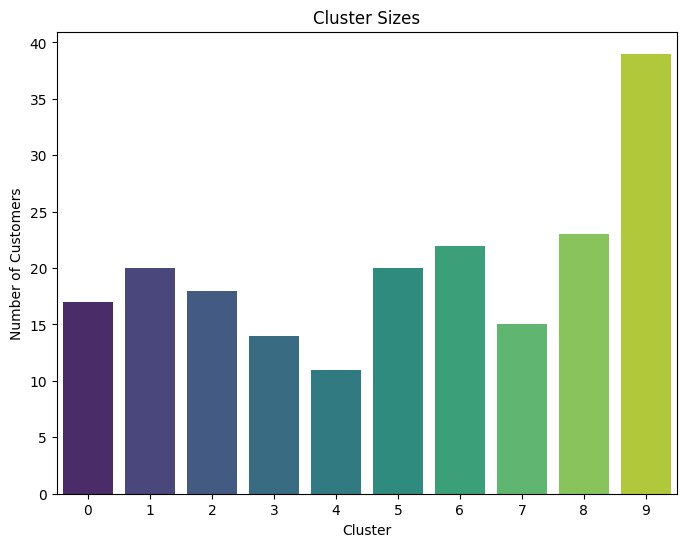

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot cluster sizes
plt.figure(figsize=(8, 6))
sns.barplot(x=cluster_counts.index, y=cluster_counts.values, palette='viridis')
plt.title('Cluster Sizes')
plt.xlabel('Cluster')
plt.ylabel('Number of Customers')
plt.show()


<ipython-input-36-a109e5450c3e>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster', y='TotalValue', data=customer_features, palette='viridis')


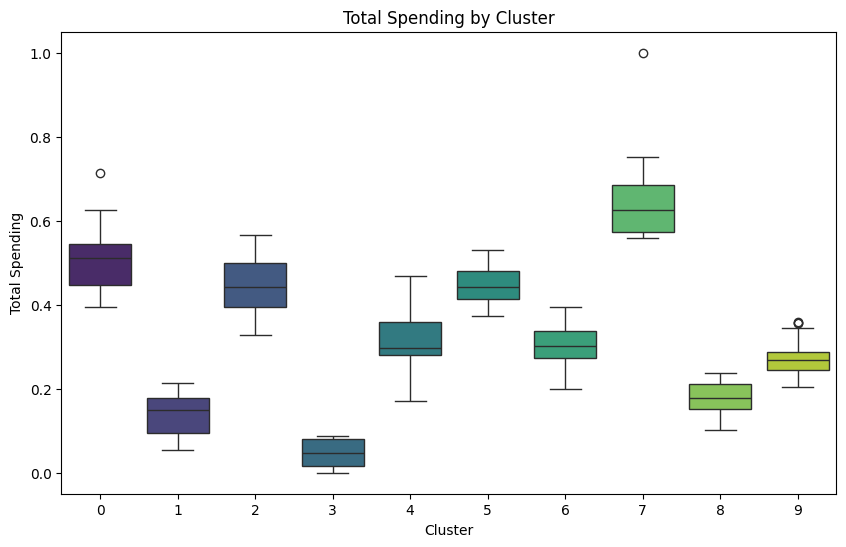

In [36]:
# Box plot to analyze spending distribution in clusters
plt.figure(figsize=(10, 6))
sns.boxplot(x='Cluster', y='TotalValue', data=customer_features, palette='viridis')
plt.title('Total Spending by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Total Spending')
plt.show()


Step 4: Visualize Clusters

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.8/88.8 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 4.9 MB/s eta 0:00:00


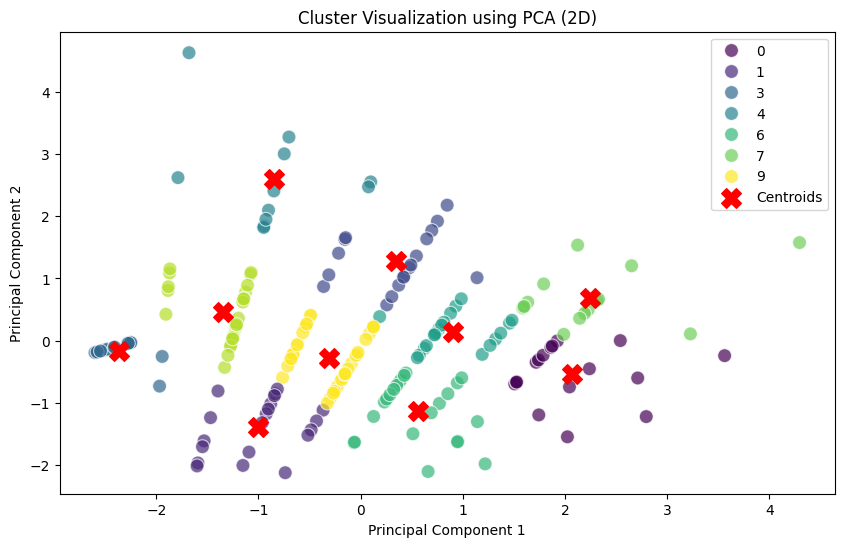

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
!pip install umap-learn
import umap

# Step 1: Perform Dimensionality Reduction for 2D visualization

# You can use PCA, t-SNE, or UMAP for dimensionality reduction
# Using PCA here
pca = PCA(n_components=2)
pca_components = pca.fit_transform(scaled_features)

# Alternatively, use t-SNE or UMAP for better visual clustering
# tsne = TSNE(n_components=2, random_state=42)
# tsne_components = tsne.fit_transform(scaled_features)

# umap = umap.UMAP(n_components=2, random_state=42)
# umap_components = umap.fit_transform(scaled_features)

# Step 2: Plot Clusters

# Plot using PCA components (or use t-SNE or UMAP components)
plt.figure(figsize=(10, 6))
sns.scatterplot(x=pca_components[:, 0], y=pca_components[:, 1], hue=customer_features['Cluster'], palette='viridis', s=100, alpha=0.7)

# Step 3: Add Cluster Centroids (if applicable)

# For K-Means: Plot the centroids of clusters
if 'Cluster' in customer_features.columns:
    kmeans = KMeans(n_clusters=best_n_clusters, random_state=42)
    kmeans.fit(scaled_features)
    centroids = kmeans.cluster_centers_

    # Transform centroids into 2D for PCA visualization
    centroid_pca = pca.transform(centroids)

    plt.scatter(centroid_pca[:, 0], centroid_pca[:, 1], s=200, c='red', marker='X', label='Centroids')

# Step 4: Customize and show plot
plt.title('Cluster Visualization using PCA (2D)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

# Optional: If you'd like to use t-SNE or UMAP for better cluster separation
# Use the following:
# sns.scatterplot(x=tsne_components[:, 0], y=tsne_components[:, 1], hue=customer_features['Cluster'], palette='viridis', s=100, alpha=0.7)
# plt.title('Cluster Visualization using t-SNE (2D)')
# plt.show()


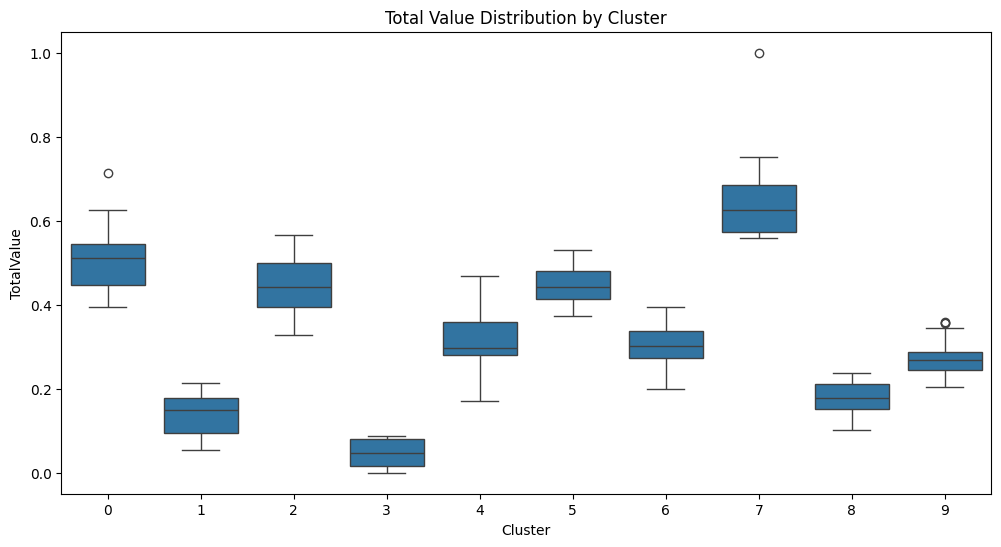

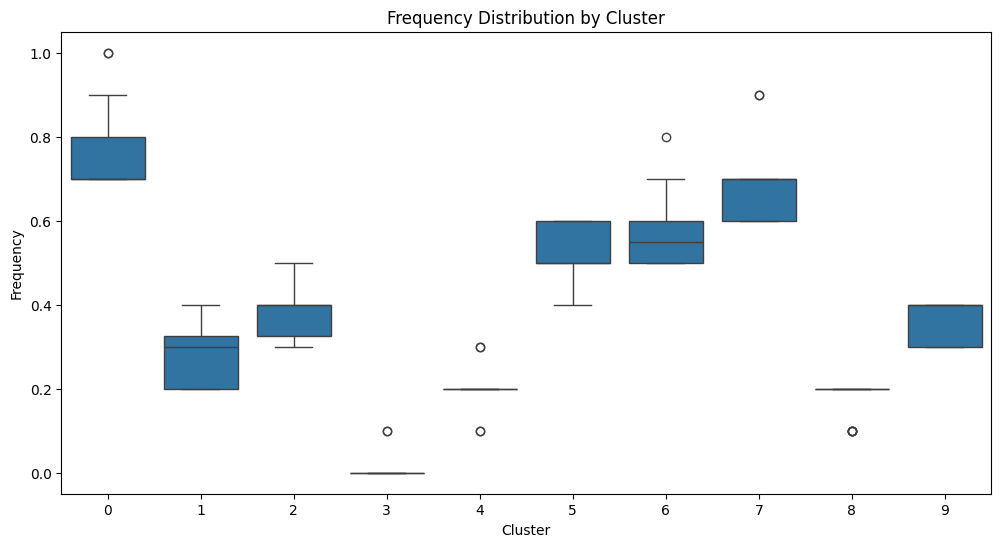

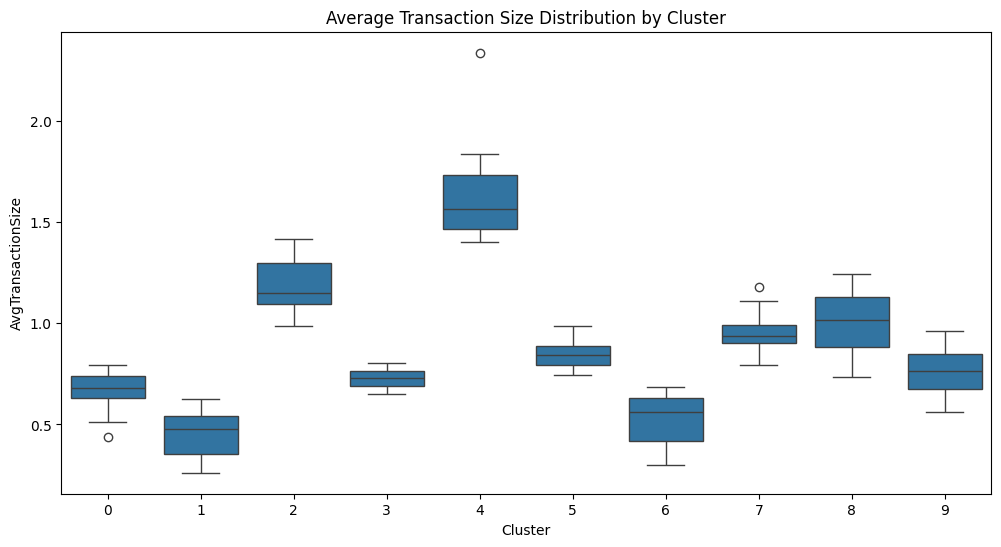

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot distribution of key features for each cluster
plt.figure(figsize=(12, 6))
sns.boxplot(data=customer_features, x='Cluster', y='TotalValue')
plt.title('Total Value Distribution by Cluster')
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(data=customer_features, x='Cluster', y='Frequency')
plt.title('Frequency Distribution by Cluster')
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(data=customer_features, x='Cluster', y='AvgTransactionSize')
plt.title('Average Transaction Size Distribution by Cluster')
plt.show()


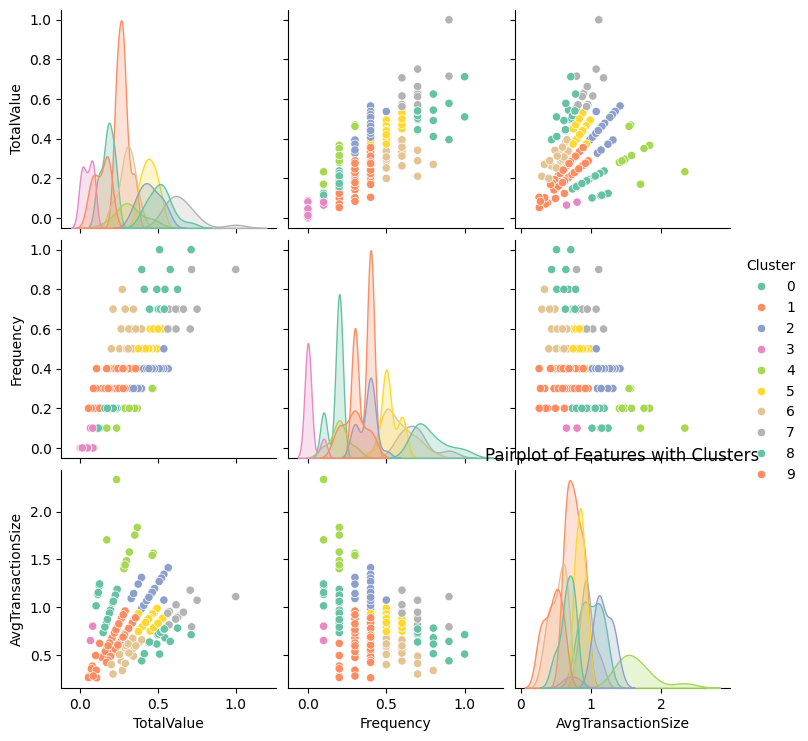

In [41]:
sns.pairplot(customer_features[['TotalValue', 'Frequency', 'AvgTransactionSize', 'Cluster']], hue='Cluster', palette='Set2')
plt.title('Pairplot of Features with Clusters')
plt.show()


<ipython-input-42-b2fc1749a77f>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cluster_size.index, y=cluster_size.values, palette='Set2')


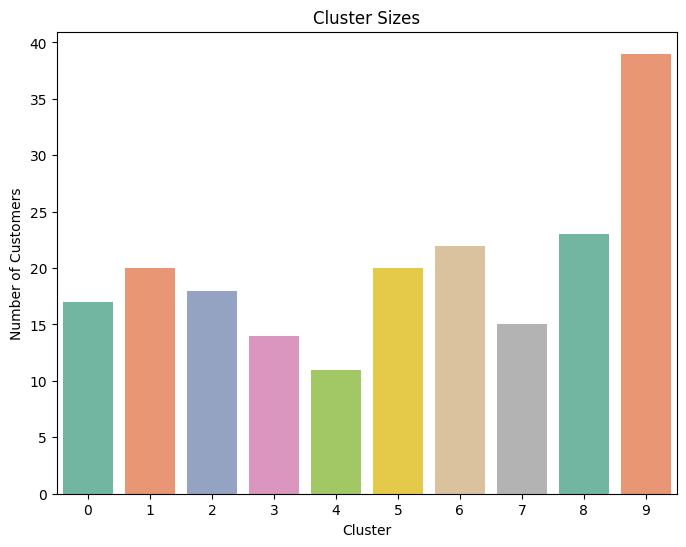

In [42]:
plt.figure(figsize=(8, 6))
cluster_size = customer_features['Cluster'].value_counts()
sns.barplot(x=cluster_size.index, y=cluster_size.values, palette='Set2')
plt.title('Cluster Sizes')
plt.xlabel('Cluster')
plt.ylabel('Number of Customers')
plt.show()


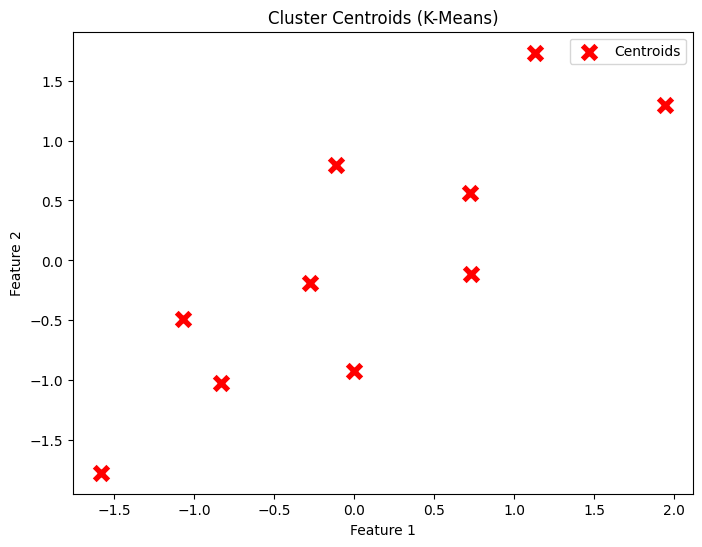

In [43]:
if 'KMeans' in globals():  # Check if KMeans is being used
    centroids = kmeans.cluster_centers_
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=centroids[:, 0], y=centroids[:, 1], s=200, color='red', marker='X', label='Centroids')
    plt.title('Cluster Centroids (K-Means)')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()
    plt.show()


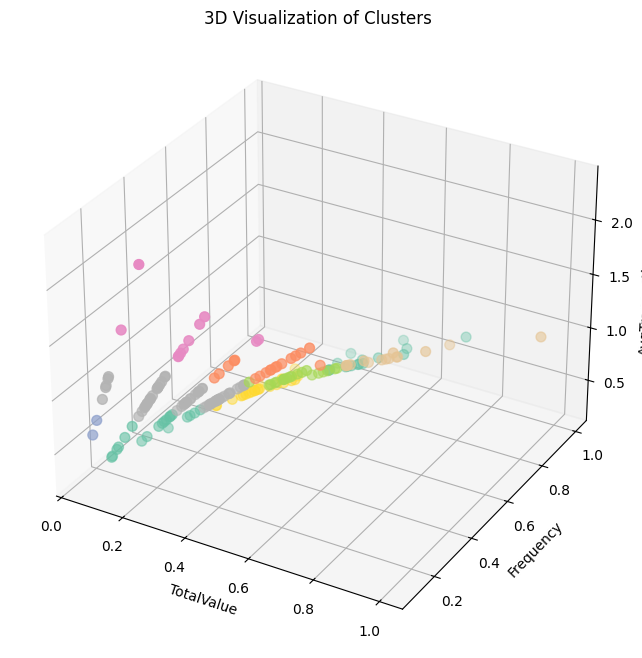

In [44]:
from mpl_toolkits.mplot3d import Axes3D

# 3D scatter plot
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(customer_features['TotalValue'], customer_features['Frequency'], customer_features['AvgTransactionSize'],
           c=customer_features['Cluster'], cmap='Set2', s=50)
ax.set_xlabel('TotalValue')
ax.set_ylabel('Frequency')
ax.set_zlabel('AvgTransactionSize')
plt.title('3D Visualization of Clusters')
plt.show()


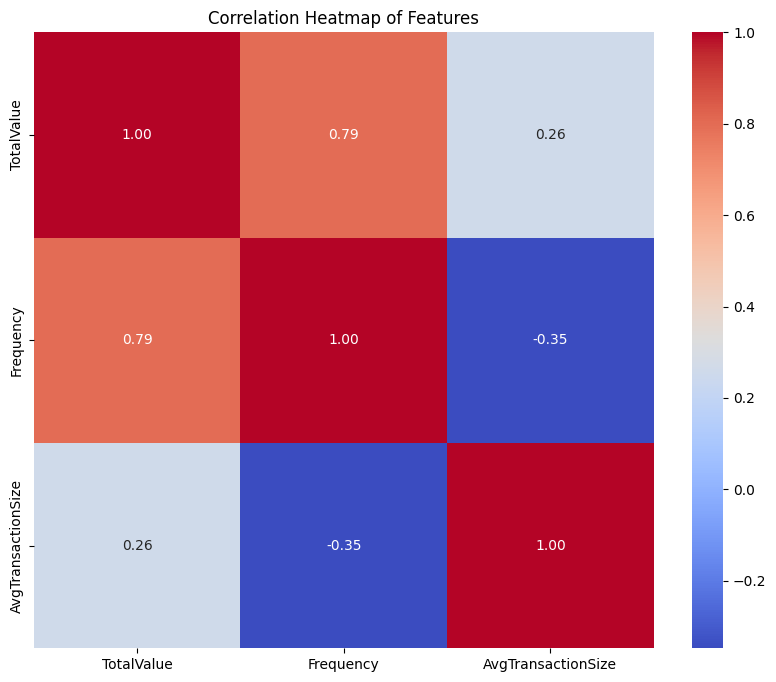

In [45]:
plt.figure(figsize=(10, 8))
sns.heatmap(customer_features[['TotalValue', 'Frequency', 'AvgTransactionSize']].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Features')
plt.show()


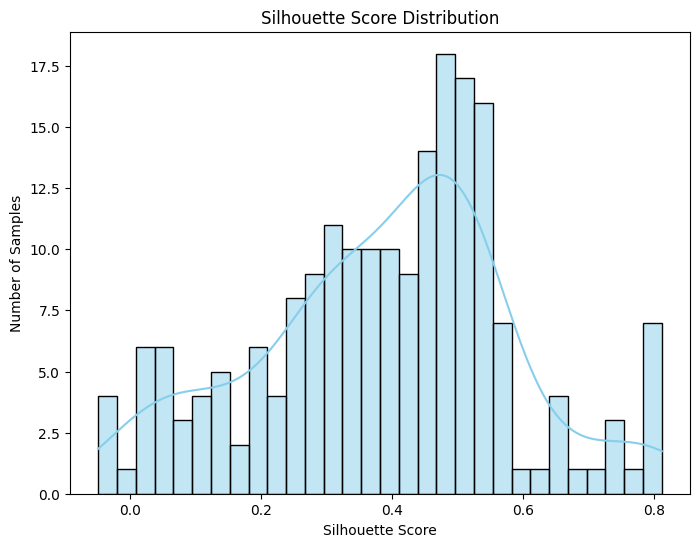

In [46]:
from sklearn.metrics import silhouette_samples

silhouette_values = silhouette_samples(scaled_features, customer_features['Cluster'])
plt.figure(figsize=(8, 6))
sns.histplot(silhouette_values, kde=True, color='skyblue', bins=30)
plt.title('Silhouette Score Distribution')
plt.xlabel('Silhouette Score')
plt.ylabel('Number of Samples')
plt.show()
